In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random
import seaborn as sns

## Import Data


In [2]:
file_to_load = "Resources/Pokemon_main_values.csv"
chart_to_load = "resources/chart.csv"
Pokemon_chart = pd.read_csv(chart_to_load)
Pokemon_data = pd.read_csv(file_to_load)
Pokemon_data
#Pokemon_chart

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6


## Clean Data

## Random Pokemon Generator

In [3]:
randomnum = random.randrange(1, 800)
random_pokemon= Pokemon_data.loc[randomnum]
random_pokemon

#                    565
Name          Carracosta
Type 1             Water
Total                495
HP                    74
Attack               108
Defense              133
Sp. Atk               83
Sp. Def               65
Speed                 32
Generation             5
Name: 626, dtype: object

## Number of Resistances and Effectivenesses by Type 

In [4]:
TypeChart = pd.DataFrame()

PokemonTypesChart = list(Pokemon_chart.columns)
PokemonTypesChart.remove("Attacking")

WeaknessList = []

for index, row in Pokemon_chart.iterrows():
    effective = row.loc[row ==2.0]
    effective = len(effective)
    TypeChart.loc[index, 'Type'] = row.Attacking
    TypeChart.loc[index, 'Effective'] = effective

for column in PokemonTypesChart:
    weakness = (Pokemon_chart[column].loc[Pokemon_chart[column] == 2.0])
    weakness = len(weakness)
    WeaknessList.append(weakness)
TypeChart["Weakness"] = WeaknessList

#Clean Table
TypeChart.Effective = TypeChart.Effective.astype(int)
TypeChart.head()
TypeChart = TypeChart.set_index("Type")
TypeChart

,Effective,Weakness
Type,,
Normal,0,1
Fire,4,3
Water,3,2
Electric,2,1
Grass,3,5
Ice,4,4
Fighting,5,3
Poison,2,2
Ground,5,3


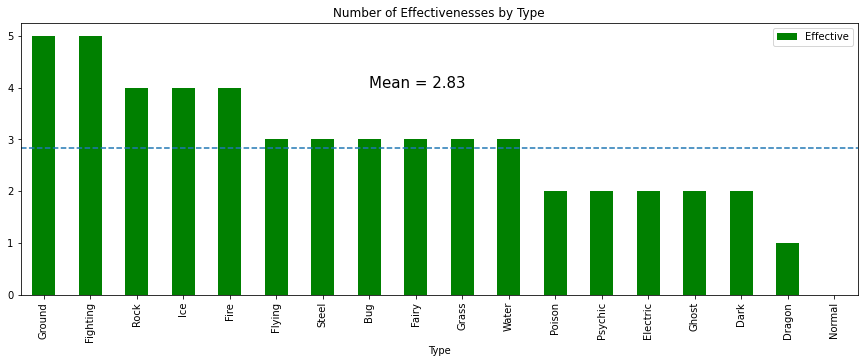

In [ ]:
EffectiveTable = TypeChart.drop(['Weakness'], axis=1)
MeanEffectiveTable = float(round(EffectiveTable.mean(), 2))
EffectiveTable =EffectiveTable.sort_values('Effective', ascending = False)
EffectiveBar =(EffectiveTable.plot(kind="bar", title = 'Number of Effectivenesses by Type', color = "g",figsize=(15,5)).axhline(y=MeanEffectiveTable, linestyle='--'))
plt.annotate(f'Mean = {MeanEffectiveTable}', (7,4),fontsize=15,color="black")
plt.show()

WeaknessTable = TypeChart.drop(['Effective'], axis=1)
MeanWeaknessTable = float(round(WeaknessTable.mean(), 2))
WeaknessTable =WeaknessTable.sort_values('Weakness')
WeaknessBar =(WeaknessTable.plot(kind="bar", title = 'Number of Weaknesses by Type', color = "r", figsize=(15,5)).axhline(y=MeanWeaknessTable, linestyle='--'))
plt.annotate(f'Mean = {MeanWeaknessTable}', (7,4),fontsize=15,color="black")
plt.show()




## Pokemon Ranking

In [ ]:
Pokemon_data.columns

In [ ]:
filtered_df = Pokemon_data[['Name','Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
filtered_df.head()

In [ ]:
Poke_df = filtered_df.loc[Pokemon_data["Type 1"] == random_pokemon[1]] 
Poke_df

In [ ]:
sns.boxplot(data=Poke_df)
print(random_pokemon[1])

In [ ]:
sns.boxplot(data=Pokemon_data)

In [ ]:
stats_Pokemon_data = Pokemon_data.drop(['Total','Generation'], axis =1)


In [ ]:
sns.boxplot(data=stats_Pokemon_data)
yaxis='points'

## Attack vs Defense Correlation by Type

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [ ]:
poke_list = list(Pokemon_data['Type 1'].unique())

rvalue_list = []

for i in poke_list:
    poke_df = Pokemon_data.loc[Pokemon_data['Type 1'] == i]
    
    x = poke_df['Attack']
    y = poke_df['Defense']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f'The r-squared is : {rvalue}')
    regress_value = x * slope + intercept
    rvalue_list.append(rvalue)
    
    plt.scatter(x,y)
    plt.plot(x,regress_value,"r-")
    
    plt.title(i)
    plt.xlabel('Attack')
    plt.ylabel('Defense')
    plt.show()

In [ ]:
poke_rd = Pokemon_data.loc[Pokemon_data['Type 1'] == random_pokemon[1]]
plt.scatter(poke_rd['Attack'],poke_rd['Defense'])
plt.show()

## Statistical Analysis of Attack vs Defense  by Type

In [ ]:
attack_median = []
attack_lq = []
attack_uq = []
attack_iqr = []
attack_lb = []
attack_ub = []

defense_median = []
defense_lq = []
defense_uq = []
defense_iqr = []
defense_lb = []
defense_ub = []

for i in poke_list:
    poke_df = Pokemon_data.loc[Pokemon_data['Type 1'] == i]
    
    quartiles_a = poke_df["Attack"].quantile([.25,.5,.75])
    lowerq_a = quartiles_a[0.25]
    upperq_a = quartiles_a[0.75]
    iqr_a = upperq_a-lowerq_a
    lower_bound_a = lowerq_a - (1.5*iqr_a)
    upper_bound_a = upperq_a + (1.5*iqr_a)
        
    quartiles_d = poke_df["Defense"].quantile([.25,.5,.75])
    lowerq_d = quartiles_d[0.25]
    upperq_d = quartiles_d[0.75]
    iqr_d = upperq_d-lowerq_d
    lower_bound_d = lowerq_d - (1.5*iqr_d)
    upper_bound_d = upperq_d + (1.5*iqr_d)
    
    attack_median.append(quartiles_a[0.5])
    attack_lq.append(lowerq_a)
    attack_uq.append(upperq_a)
    attack_iqr.append(iqr_a)
    attack_lb.append(lower_bound_a)
    attack_ub.append(upper_bound_a)
    defense_median.append(quartiles_d[0.5])
    defense_lq.append(lowerq_d)
    defense_uq.append(upperq_d)
    defense_iqr.append(iqr_d)
    defense_lb.append(lower_bound_d)
    defense_ub.append(upper_bound_d)
    
    print(f"----------{i}--------------")
    print("Attack")
    print(f"Median: {quartiles_a[.5]}")
    print(f"Lower quartile: {lowerq_a}")
    print(f"Upper quartile:{upperq_a}")
    print(f"Interquartile: {iqr_a}")
    print(f"Values above {upper_bound_a} could be outliers")
    print(f"Values below {lower_bound_a} could be outliers")
    print("Defense")
    print(f"Median: {quartiles_d[.5]}")
    print(f"Lower quartile: {lowerq_d}")
    print(f"Upper quartile: {upperq_d}")
    print(f"Interquartile: {iqr_d}")
    print(f"Values above {upper_bound_d} could be outliers")
    print(f"Values below {lower_bound_d} could be outliers")
   

In [ ]:
poke_table = pd.DataFrame({'Type':poke_list,
                             'Attack Median':attack_median,
                             'Lower quartile': attack_lq,
                             'Upper quartile':attack_uq,
                             'Iqr':attack_iqr,
                             'Lower bound':attack_lb,
                             'Upper bound':attack_ub,
                             'Defense Median':defense_median,
                             'Loewr quartile':defense_lq,
                             'Upper quartile':defense_uq,
                             'Iqr':defense_iqr,
                             'Lower bound':defense_lb,
                             'Upper bound':defense_ub,
                             'R-value':rvalue_list
                            })
poke_table